In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
parent_dir="/content/drive/My Drive/Colab Notebooks/IMDB_RNN/"  

In [3]:
import numpy as np
from keras.datasets import imdb
from collections import Counter

Using TensorFlow backend.


In [0]:
(x_train,y_train),(x_test,y_test)=imdb.load_data(num_words=10000,skip_top=100)

In [5]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((25000,), (25000,), (25000,), (25000,))

In [6]:
Counter(y_train)                                 #binary classification problem

Counter({0: 12500, 1: 12500})

In [7]:
x_train

array([list([2, 2, 2, 2, 2, 530, 973, 1622, 1385, 2, 458, 4468, 2, 3941, 2, 173, 2, 256, 2, 2, 100, 2, 838, 112, 2, 670, 2, 2, 2, 480, 284, 2, 150, 2, 172, 112, 167, 2, 336, 385, 2, 2, 172, 4536, 1111, 2, 546, 2, 2, 447, 2, 192, 2, 2, 2, 147, 2025, 2, 2, 2, 2, 1920, 4613, 469, 2, 2, 2, 2, 2, 2, 2, 530, 2, 2, 2, 2, 1247, 2, 2, 2, 515, 2, 2, 2, 626, 2, 2, 2, 2, 386, 2, 2, 316, 2, 106, 2, 2, 2223, 5244, 2, 480, 2, 3785, 2, 2, 130, 2, 2, 2, 619, 2, 2, 124, 2, 2, 135, 2, 2, 1415, 2, 2, 2, 2, 215, 2, 2, 2, 2, 2, 407, 2, 2, 2, 2, 2, 107, 117, 5952, 2, 256, 2, 2, 2, 3766, 2, 723, 2, 2, 2, 530, 476, 2, 400, 317, 2, 2, 2, 2, 1029, 2, 104, 2, 2, 381, 2, 297, 2, 2, 2071, 2, 2, 141, 2, 194, 7486, 2, 2, 226, 2, 2, 134, 476, 2, 480, 2, 144, 2, 5535, 2, 2, 2, 2, 224, 2, 2, 104, 2, 226, 2, 2, 2, 1334, 2, 2, 2, 283, 2, 2, 4472, 113, 103, 2, 2, 2, 5345, 2, 178, 2]),
       list([2, 194, 1153, 194, 8255, 2, 228, 2, 2, 1463, 4369, 5012, 134, 2, 2, 715, 2, 118, 1634, 2, 394, 2, 2, 119, 954, 189, 102, 2, 207

In [8]:
from keras.preprocessing import sequence

#sequences shorter than 500 characters will be padded, longer than 500 will 
#be clipped from end (u can also clip from beginning (see docs, if u want))
x_train=sequence.pad_sequences(x_train,maxlen=500)     
x_test=sequence.pad_sequences(x_test,maxlen=500)

x_train.shape,x_test.shape

((25000, 500), (25000, 500))

# Creating the model


In [9]:
from keras.layers import Embedding,Dense,SimpleRNN
from keras.models import Sequential

model=Sequential()
model.add(Embedding(input_dim=10000,output_dim=10))                         
#10000 is the vocabulary size (10000 words in our vocabulary) and 
#10 is the size of the output vector for each word 
#(u can specify any size greater than 1)

model.add(SimpleRNN(units=32))                                   
#32 is the size of output(a) given by each RNN layer (it is NOT the no. of RNN cells in the network, the no. of RNN 
#cells in the network depends on the maxlen of each sentence u are feeding to the network, which is 500 in this case)

model.add(Dense(1,activation="sigmoid"))                 #we need only one unit as it is a binary classification problem

model.summary()




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 10)          100000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                1376      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 101,409
Trainable params: 101,409
Non-trainable params: 0
_________________________________________________________________


In [10]:
from keras import optimizers
model.compile(optimizer="rmsprop",loss="binary_crossentropy",metrics=["accuracy"])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping

checkpoint=ModelCheckpoint(parent_dir+"model.h5",monitor="val_loss",verbose=1,save_best_only=True)
stopping=EarlyStopping(monitor="val_acc",patience=2,verbose=1)

In [12]:
hist=model.fit(x_train,y_train,batch_size=32,epochs=10,validation_split=0.2,callbacks=[checkpoint,stopping])




Train on 20000 samples, validate on 5000 samples
Epoch 1/10





20000/20000 [==============================] - 43s 2ms/step - loss: 0.6247 - acc: 0.6348 - val_loss: 0.6083 - val_acc: 0.6990

Epoch 00001: val_loss improved from inf to 0.60829, saving model to /content/drive/My Drive/Colab Notebooks/IMDB_RNN/model.h5
Epoch 2/10
20000/20000 [==============================] - 42s 2ms/step - loss: 0.3917 - acc: 0.8288 - val_loss: 0.3536 - val_acc: 0.8546

Epoch 00002: val_loss improved from 0.60829 to 0.35360, saving model to /content/drive/My Drive/Colab Notebooks/IMDB_RNN/model.h5
Epoch 3/10
20000/20000 [==============================] - 42s 2ms/step - loss: 0.3311 - acc: 0.8621 - val_loss: 0.4935 - val_acc: 0.8106

Epoch 00003: val_loss did not improve from 0.35360
Epoch 4/10
20000/20000 [==============================] - 42s 2ms/step - loss: 0.2948 - acc: 0.8821 - val_loss: 0.3753 - val_acc: 0.8346

Epoch 00004: val_loss did not improve from 0.35360
Epoch 00004: early stopping


In [0]:
#model.save(parent_dir+"model.h5")                    #saved in hdf5 format

In [0]:
from keras.models import load_model

model=load_model(parent_dir+"model.h5")

In [15]:
model.evaluate(x_train,y_train)

25000/25000 [==============================] - 14s 564us/step


[0.28982366483688354, 0.88564]

In [16]:
model.evaluate(x_test,y_test)

25000/25000 [==============================] - 14s 557us/step


[0.3593908804702759, 0.84836]

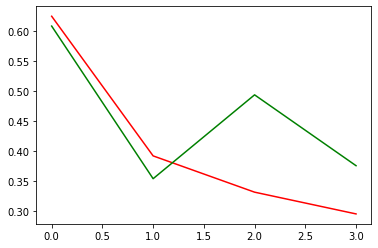

In [17]:
import matplotlib.pyplot as plt

plt.plot(hist.history["loss"],c="r")
plt.plot(hist.history["val_loss"],c="g")

plt.show()

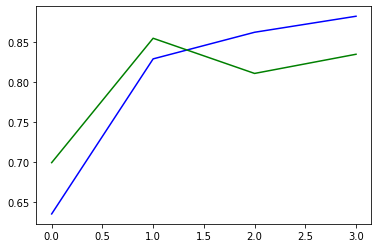

In [18]:
plt.plot(hist.history["acc"],c="b")
plt.plot(hist.history["val_acc"],c="g")

plt.show()